# Environment Tests

## Testing Geopandas

In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
from raindownloader.downloader import Downloader
from raindownloader.inpeparser import INPEParsers, INPETypes
import logging

downloader = Downloader(server=INPEParsers.FTPurl, parsers=INPEParsers.parsers, local_folder='../tmp')

In [3]:
class obj:
    pass
args = obj()

args.dates = ('20230601', '20230620')
args.type = INPETypes.DAILY_RAIN

cube = downloader.create_cube(
    start_date=args.dates[0],
    end_date=args.dates[1],
    datatype=args.type,
)

In [4]:
shp = gpd.read_file('../data/states/BR_UF_2022.shp')

In [5]:
shp.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

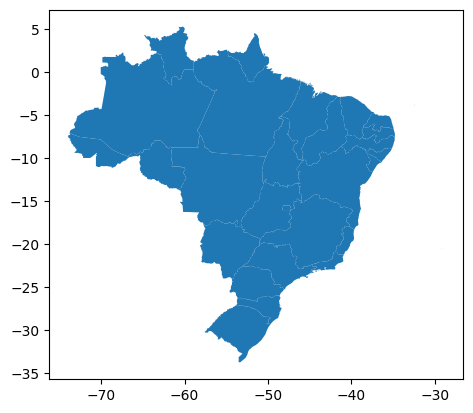

In [6]:
shp.plot()

In [7]:
cutted = cube.rio.clip(shp.geometry)

<Axes: title={'center': 'step = 0 days 00:00:00, surface = 0.0 [1], spat...'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

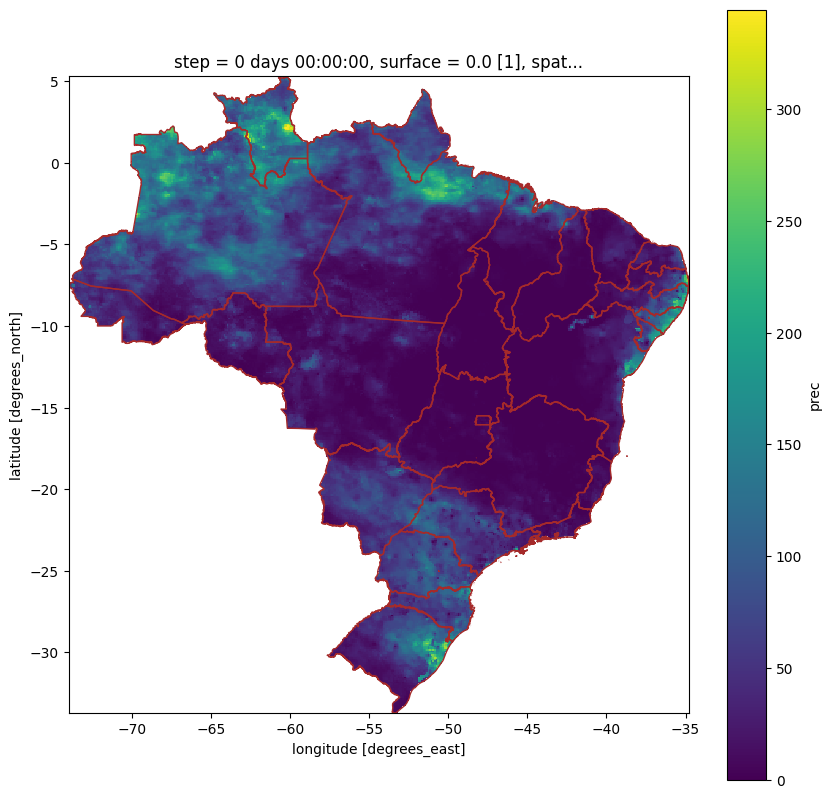

In [8]:
# create a thumbnail
fig, ax = plt.subplots(figsize=(10, 10))
cube_accum = cube.sum(dim="time")
cutted = cube_accum.rio.clip(shp.geometry)
cutted.plot(ax=ax, )
shp.plot(ax=ax, facecolor='none', edgecolor='brown')


In [9]:
series_pd = Downloader.get_time_series(
    cube=cube,
    shp=shp,
    reducer=xr.DataArray.mean
)

Coverting shp CRS to EPSG:4326


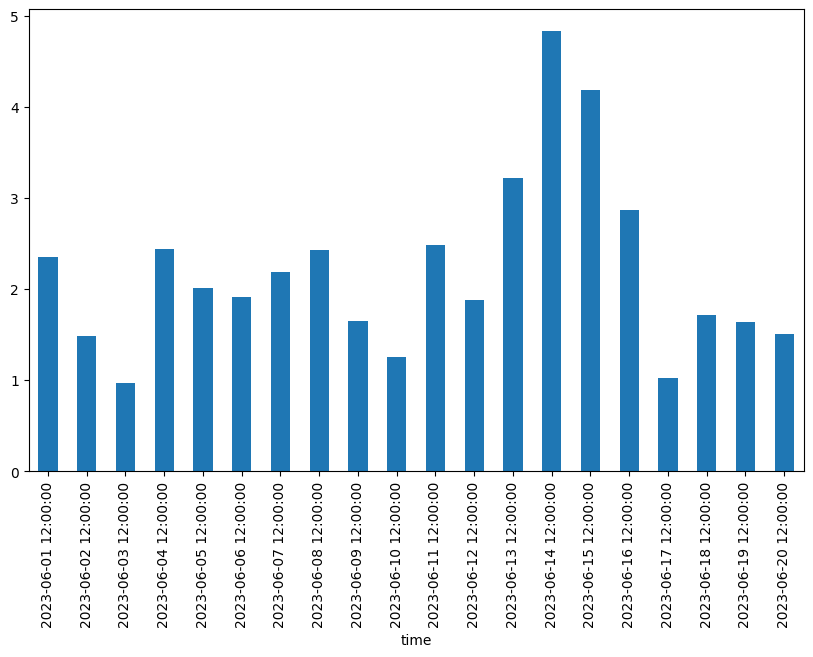

In [10]:
axes = series_pd.plot(kind='bar', figsize=(10, 6))

In [11]:
rs = shp.query("SIGLA_UF == 'RS'")
south = shp.query("SIGLA_UF in ['RS', 'SC', 'PR']")

In [34]:
from raindownloader.utils import GISUtil

GISUtil.animate_cube(
    cube=cube,
    filename='../tmp/animation_south.gif',
    shp=south,
    max_quantile=0.9995,
    frametime=25,
    title='Monthly Acumulated'
)

Appending: 2023-06-01T12:00:00.000000000
Appending: 2023-06-02T12:00:00.000000000
Appending: 2023-06-03T12:00:00.000000000
Appending: 2023-06-04T12:00:00.000000000
Appending: 2023-06-05T12:00:00.000000000
Appending: 2023-06-06T12:00:00.000000000
Appending: 2023-06-07T12:00:00.000000000
Appending: 2023-06-08T12:00:00.000000000
Appending: 2023-06-09T12:00:00.000000000
Appending: 2023-06-10T12:00:00.000000000
Appending: 2023-06-11T12:00:00.000000000
Appending: 2023-06-12T12:00:00.000000000
Appending: 2023-06-13T12:00:00.000000000
Appending: 2023-06-14T12:00:00.000000000
Appending: 2023-06-15T12:00:00.000000000
Appending: 2023-06-16T12:00:00.000000000
Appending: 2023-06-17T12:00:00.000000000
Appending: 2023-06-18T12:00:00.000000000
Appending: 2023-06-19T12:00:00.000000000
Appending: 2023-06-20T12:00:00.000000000


<Figure size 640x480 with 0 Axes>

In [ ]:
# ARRUMAR O TITULO DO GRÁFICO

In [38]:
countries = gpd.read_file('https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_0_countries.geojson')


In [39]:
countries['continent'].unique()

array(['Asia', 'Africa', 'Europe', 'South America', 'Antarctica',
       'Seven seas (open ocean)', 'Oceania', 'North America'],
      dtype=object)

In [40]:
SA = countries.query("continent in ['South America']")

In [113]:
SA.to_file('../data/south_america.geojson')

<Axes: >

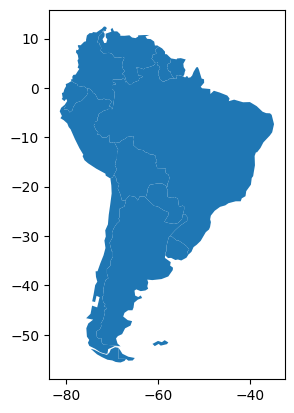

In [112]:
gpd.read_file('../data/south_america.geojson').plot()

In [35]:
cube = downloader.create_cube(
    start_date='2000-01',
    end_date='2000-12',
    datatype=INPETypes.MONTHLY_ACCUM,
)

In [43]:
GISUtil.animate_cube(
    cube=cube,
    filename='../tmp/south_america.gif',
    shp=SA,
    max_quantile=0.995,
    frametime=25,
    title='Climatology (Monthly Acumulated)',
    dateformat='%Y-%m'
)

Appending: 2022-01-01T12:00:00.000000000
Appending: 2022-02-01T12:00:00.000000000
Appending: 2022-03-01T12:00:00.000000000
Appending: 2022-04-01T12:00:00.000000000
Appending: 2022-05-01T12:00:00.000000000
Appending: 2022-06-01T12:00:00.000000000
Appending: 2022-07-01T12:00:00.000000000
Appending: 2022-08-01T12:00:00.000000000
Appending: 2022-09-01T12:00:00.000000000
Appending: 2022-10-01T12:00:00.000000000
Appending: 2022-11-01T12:00:00.000000000
Appending: 2022-12-01T12:00:00.000000000


<Figure size 640x480 with 0 Axes>

In [74]:
cutcube = GISUtil.cut_cube_by_geoms(cube, rs.geometry)

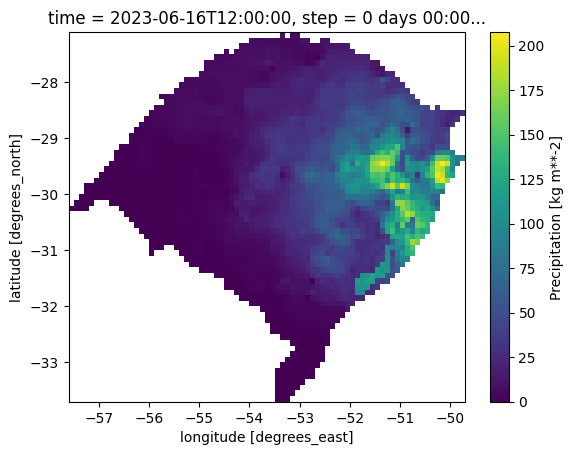

In [77]:
cutcube[15].plot()

In [116]:
INPETypes.DAILY_AVERAGE.value

{'id': <enum.auto at 0xffff55a29fc0>, 'var': 'pmed'}

In [93]:

from PIL import Image

files = [Path('../tmp/')/f'fig{i}.png' for i in range(15)]

images = [Image.open(file) for file in files]

images[0].save('../tmp/output.gif', save_all=True, append_images=images[1:], duration=100, loop=0)



(<Figure size 640x480 with 1 Axes>, <Axes: >)

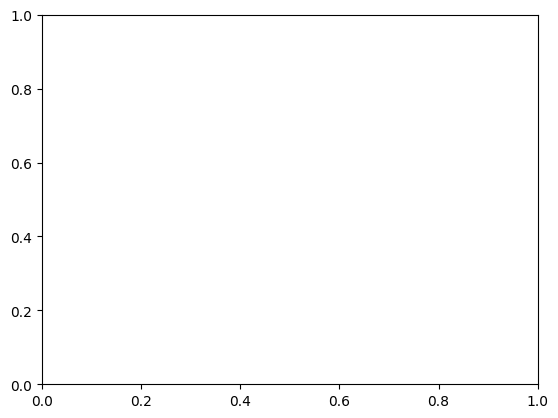

In [97]:
plt.subplots(num=1)

## Testing Rasterio

In [15]:
import rasterio as rio

In [16]:

dataset = rio.open(onedrive/'Transfer/Images/S2B_MSIL2A_20220924T133149_N0400_R081_T22KEV_20220924T173829.SAFE/GRANULE/L2A_T22KEV_A028993_20220924T133741/IMG_DATA/R10m/T22KEV_20220924T133149_B02_10m.jp2')

In [17]:
array = dataset.read().shape

## Testing Contextily

In [21]:
import contextily as cx

In [28]:
parana = gpd.read_file(shapes/'bacia_Parana.shp').to_crs(dataset.crs)

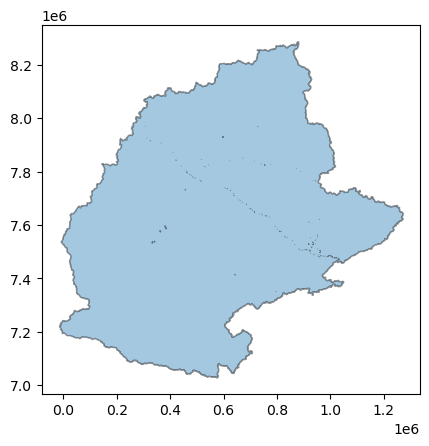

In [36]:
ax = parana.plot(alpha=0.4, edgecolor='black')

In [37]:
cx.add_basemap(ax=ax, source=dataset.name, crs=dataset.crs, reset_extent=True, vmin=0, vmax=2000)

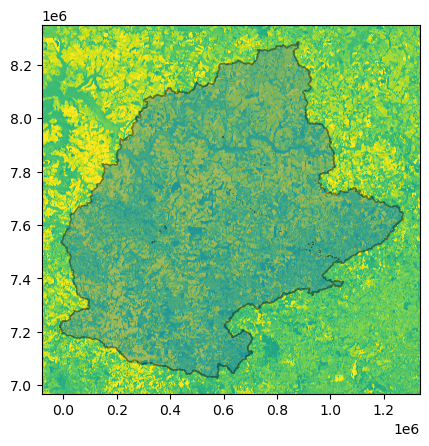

In [38]:
ax.figure